In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
array = np.genfromtxt(
        fname='data2.csv',
        delimiter=';',      # Указываем разделитель колонок
        encoding='utf-8-sig',  # Учитываем BOM в начале файла
    )

x = np.genfromtxt(
        fname='data2.csv',
        delimiter=';',      # Указываем разделитель колонок
        encoding='utf-8-sig',  # Учитываем BOM в начале файла
        usecols=(0,)
    )

y = np.genfromtxt(
        fname='data2.csv',
        delimiter=';',      # Указываем разделитель колонок
        encoding='utf-8-sig',  # Учитываем BOM в начале файла
        usecols=(-1,)
    )

print(x,y)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ] [-7.69796582 -6.57266488 -5.37046782 -3.15858504 -1.48270657 -0.12384439
  2.40389623  4.14683298  6.32790239  8.82291549 10.88542758 13.31557662
 15.47213024 17.26743396 18.81843147 20.6263378  23.04006768 23.92053257
 25.32216894 26.52298732 26.76261011 27.65896563 27.35973442 27.37007024
 26.15215361 25.23920411]


In [3]:
A_vector = [array[0][0], array[len(array)//2][0], array[-1][0]]
b_vector = [array[0][1], array[len(array)//2][1], array[-1][1]]
A_matrix = np.vander(A_vector)

print("Определяем детерминант матрицы")
if np.linalg.det(A_matrix) == 0:
    print("Матрица вырожденная. СЛУ не имеет решения")
else:
    print("Матрица не вырожденная")

Определяем детерминант матрицы
Матрица не вырожденная


In [4]:
#np_solve = np.linalg.solve(A_matrix, b_vector)
sp_solve = sp.linalg.solve(A_matrix, b_vector)

#print(np_solve)
print(sp_solve)

def parabola_func(x, coefficients):
    return (x**2)*coefficients[0]+(x**1)*coefficients[1]+(x**0)*coefficients[2]

y_predicted_parabola = parabola_func(x, sp_solve)

print(y_predicted_parabola)

print(A_vector, A_matrix, b_vector, (A_matrix@sp_solve))

[-1.25610119 12.86793993 -7.69796582]
[-7.69796582 -5.17462188 -2.75176604 -0.42939829  1.79248136  3.91387292
  5.93477638  7.85519175  9.67511902 11.3945582  13.01350928 14.53197227
 15.94994716 17.26743396 18.48443266 19.60094327 20.61696578 21.5325002
 22.34754652 23.06210475 23.67617488 24.18975691 24.60285086 24.9154567
 25.12757445 25.23920411]
[np.float64(0.0), np.float64(2.6), np.float64(5.0)] [[ 0.    0.    1.  ]
 [ 6.76  2.6   1.  ]
 [25.    5.    1.  ]] [np.float64(-7.697965818), np.float64(17.26743396), np.float64(25.23920411)] [-7.69796582 17.26743396 25.23920411]


In [5]:
A_vector_4 = [array[0][0], array[len(array)//3][0], array[len(array)//2][0], array[-1][0]]
b_vector_4 = [array[0][1], array[len(array)//3][1], array[len(array)//2][1], array[-1][1]]
A_matrix_4 = np.vander(A_vector_4)

print("Определяем детерминант матрицы")
if np.linalg.det(A_matrix_4) == 0:
    print("Матрица вырожденная")
else:
    print("Матрица не вырожденная. СЛУ не имеет решения")

Определяем детерминант матрицы
Матрица не вырожденная. СЛУ не имеет решения


In [6]:
sp_solve_4 = sp.linalg.solve(A_matrix_4, b_vector_4)

print(sp_solve_4)

def hyperbola_func(x, coefficients):
    return (x**3)*coefficients[0]+(x**2)*coefficients[1]+(x**1)*coefficients[2]+(x**0)*coefficients[3]

y_predicted_hyperbola = hyperbola_func(x, sp_solve_4)

print(y_predicted_hyperbola)

print(A_vector, A_matrix, b_vector, (A_matrix@sp_solve))

[-0.61529717  3.42015734  4.86907666 -7.69796582]
[-7.69796582e+00 -6.59226657e+00 -5.24248900e+00 -3.67816737e+00
 -1.92883595e+00 -2.40289962e-02  2.00671922e+00  4.13387444e+00
  6.32790239e+00  8.55926882e+00  1.07984395e+01  1.30158800e+01
  1.51820563e+01  1.72674340e+01  1.92424788e+01  2.10776565e+01
  2.27434328e+01  2.42102735e+01  2.54486443e+01  2.64290109e+01
  2.71218391e+01  2.74975945e+01  2.75267430e+01  2.71797503e+01
  2.64270821e+01  2.52392041e+01]
[np.float64(0.0), np.float64(2.6), np.float64(5.0)] [[ 0.    0.    1.  ]
 [ 6.76  2.6   1.  ]
 [25.    5.    1.  ]] [np.float64(-7.697965818), np.float64(17.26743396), np.float64(25.23920411)] [-7.69796582 17.26743396 25.23920411]


In [7]:
rss_quadratic = np.sum((y - y_predicted_parabola)**2)
rss_cubic = np.sum((y - y_predicted_hyperbola)**2)

print(rss_quadratic,
      rss_cubic)

if rss_quadratic < rss_cubic:
    print("Для описания зависимости лучше подходит квадратичная модель")
    best_model = parabola_func
    best_coefs = sp_solve
else:
    print("Для описания зависимости лучше подходит кубическая модель")
    best_model = hyperbola_func
    best_coefs = sp_solve_4

163.36349055625138 1.7797376781257792
Для описания зависимости лучше подходит кубическая модель


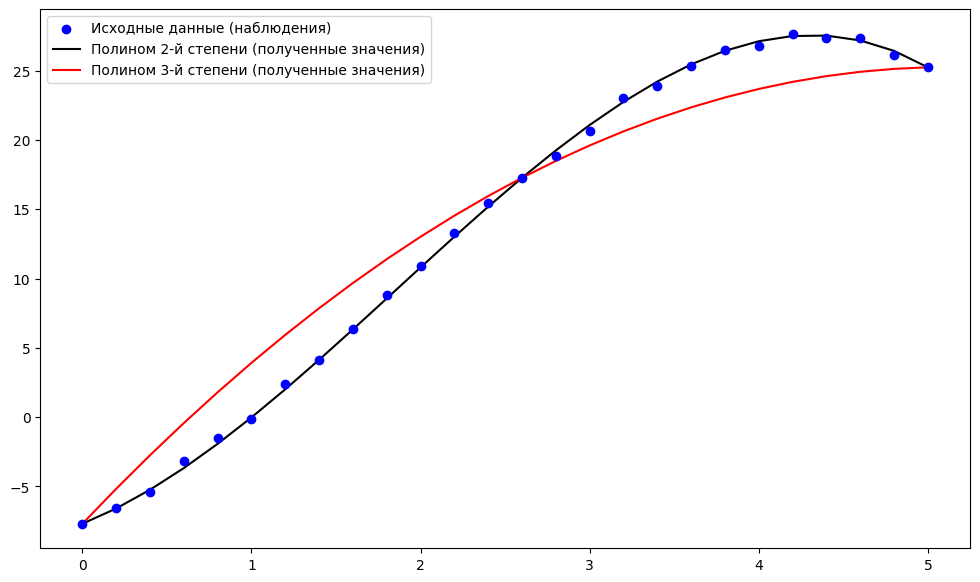

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(x, y, label='Исходные данные (наблюдения)', color='blue', zorder=5)
plt.plot(x, y_predicted_hyperbola, label=(f'Полином 2-й степени (полученные значения)'), color='black')
plt.plot(x, y_predicted_parabola, label=(f'Полином 3-й степени (полученные значения)'), color='red')
plt.legend()
plt.show()

In [9]:
print("Прогноз прибыли для x равных 6 и 8:")
pred_x_6 = best_model(6, best_coefs)
pred_x_8 = best_model(8, best_coefs)
print(pred_x_6, 
      pred_x_8)

Прогноз прибыли для x равных 6 и 8:
11.737968603984644 -64.88743627939009
